# Air Passengers Prediction (Time Series Forecasting)

### 1) Importing libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### 2) Importing data & EDA

In [2]:
data=pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.shape

(144, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### 3)Data Indexing

In [11]:
dateParser= lambda dates: dt.datetime.strptime(dates, '%Y-%m')
data=pd.read_csv('AirPassengers.csv', index_col='Month', date_parser=dateParser, parse_dates=['Month'])
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 4) Visualizatioin

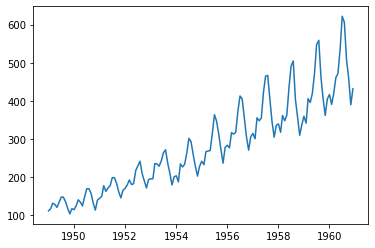

In [12]:
plt.plot(data)

In [17]:
## Identifying trend
df=data['#Passengers'].rolling(12).mean()
df

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64

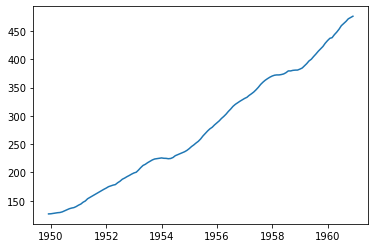

In [18]:
plt.plot(df)

### 5)Testing for Stationary dataset

In [19]:
# ADF test
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['#Passengers'].values)
result

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [20]:
p_val=result[1]
p_val
# p  val>0.05 therefore non stationary

0.9918802434376409

### 6)Making time series data stationary

0.4223667747703857

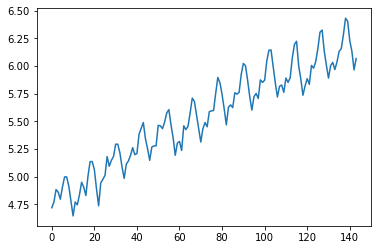

In [31]:
data_log=np.log(data['#Passengers'].values)
result=adfuller(data_log)
plt.plot(data_log)
result[1]

0.918754321761835

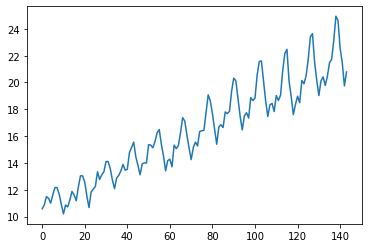

In [32]:
data_sqrt=np.sqrt(data['#Passengers'].values)
result=adfuller(data_sqrt)
plt.plot(data_sqrt)
result[1]

0.05421329028382711

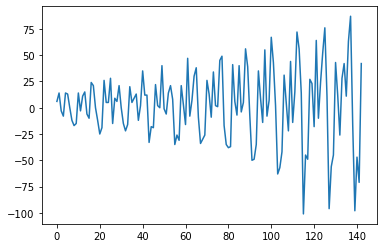

In [35]:
data_diff=np.diff(data['#Passengers'].values)
result=adfuller(data_diff)
plt.plot(data_diff)
result[1]

### 7) Modelling

In [42]:
#Simple exponential smoothening forecast Y(t+1)=aFt + (1-a)Yt
from statsmodels.tsa.api import SimpleExpSmoothing
model= SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
model

/home/inno/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [43]:
forecast=model.forecast(12)
forecast

1961-01-01    469.630092
1961-02-01    469.630092
1961-03-01    469.630092
1961-04-01    469.630092
1961-05-01    469.630092
1961-06-01    469.630092
1961-07-01    469.630092
1961-08-01    469.630092
1961-09-01    469.630092
1961-10-01    469.630092
1961-11-01    469.630092
1961-12-01    469.630092
Freq: MS, dtype: float64

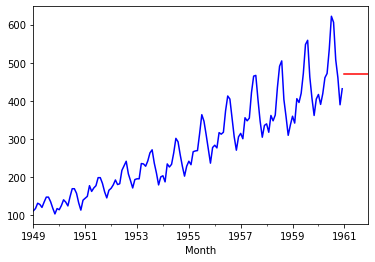

In [45]:
data['#Passengers'].plot(color='blue')
forecast.plot(color='red')

In [46]:
# holt winter exponential smoothening forecast
from statsmodels.tsa.api import ExponentialSmoothing
model= ExponentialSmoothing(data, seasonal_periods=6, trend='add', seasonal='add').fit(use_boxcox=True)

/home/inno/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/inno/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [47]:
forecast=model.forecast(12)
forecast

1961-01-01    468.494947
1961-02-01    443.690986
1961-03-01    421.609244
1961-04-01    406.788460
1961-05-01    382.067081
1961-06-01    435.956409
1961-07-01    470.485825
1961-08-01    445.591730
1961-09-01    423.429116
1961-10-01    408.553702
1961-11-01    383.740532
1961-12-01    437.828896
Freq: MS, dtype: float64

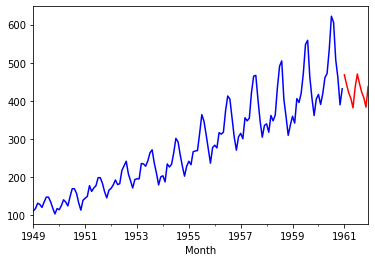

In [48]:
data['#Passengers'].plot(color='blue')
forecast.plot(color='red')

In [61]:
#ARIMA model
X=data.values
size=int(len(X)*.75)
train=X[:108]
test=X[108:]
train.size, test.size

(108, 36)

In [65]:
history=[x for x in train]
pred=list()

In [66]:
from statsmodels.tsa.arima_model import ARIMA
p=5
d=1
q=0
for t in range(len(test)):
    model=ARIMA(history, order=(p,d,q))
    model_fit=model.fit(disp=0)
    forecast=model_fit.forecast()
    pred.append(forecast[0])
    history.append(test[t])
    print(forecast[0], test[t])

[383.34898799] [340]
[351.7812906] [318]
[322.73936431] [362]
[372.88444613] [348]
[333.332466] [363]
[382.49344639] [435]
[435.78776394] [491]
[502.00633302] [505]
[497.70193341] [404]
[347.13014053] [359]
[364.77737917] [310]
[307.29747337] [337]
[394.5950142] [360]
[377.73124194] [342]
[343.94594913] [406]
[419.24797773] [396]
[377.2690715] [420]
[433.78416353] [472]
[462.00890505] [548]
[569.72776799] [559]
[544.07480232] [463]
[418.35046812] [407]
[395.54347563] [362]
[369.15411363] [405]
[462.55631363] [417]
[430.29438045] [391]
[386.8543476] [419]
[420.18552133] [461]
[470.78832752] [472]
[474.01416022] [535]
[543.79507653] [622]
[632.76040926] [606]
[582.87823767] [508]
[464.22941255] [461]
[454.92083585] [390]
[387.99464395] [432]


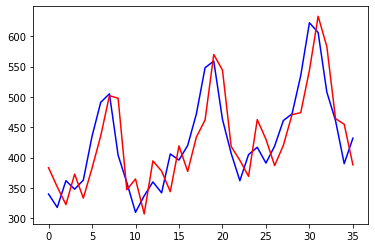

In [67]:
plt.plot(test, color='blue')
plt.plot(pred, color='red')

### Evaluate Performance

In [69]:
from sklearn.metrics import r2_score
n=test.shape[0] #sample size
p=test.shape[1] #independent var

r2=r2_score(test,pred)
adj_r2= 1-((1-r2)*(n-1)/(n-p-1))

r2, adj_r2

(0.63637505529224, 0.625680203977306)